## Deep Learning Models:

In [22]:
# Importing libraries and packages to use for deep learning
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('./Clean_dataframe/clean_df.csv')

In [24]:
# Picked top 8 correlated features 
features = ['Injury_Severity','Age_Drv1','DrugUse_Drv1','Head On','Left Turn','Other','Rear End','Same Direction']
X = df[features]
y = df['Injury']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [25]:
#Scaling is required in NN and RNN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Neural Network:

In [26]:
# construct network
model = Sequential() 
model.add(Dense(32, input_shape=(8,), activation='relu')) #first layer
model.add(Dense(32, activation='relu'))  #second layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [27]:
# Compiling model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
# Model fitting
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),  epochs=10, batch_size=512, verbose=0)

In [29]:
# Predictions
test_preds = model.predict(X_test_sc)

In [30]:
# Check the R-squared
metrics.r2_score(y_test, test_preds)

0.5670672704968946

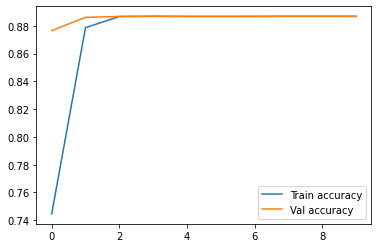

In [31]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [32]:
# Evaluating model with validation data
model.evaluate(X_test_sc, y_test, batch_size=512)

20/20 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8868


[0.31197503209114075, 0.8867982625961304]

## Recurrent Neural Network:

In [36]:
# Picked top 8 correlated features 
features = ['Injury_Severity','Age_Drv1','DrugUse_Drv1','Head On','Left Turn','Other','Rear End','Same Direction']
X = df[features]
y = df[['Injury']].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [37]:
#Scaling is required in NN and RNN
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [38]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)

In [40]:
batch_x, batch_y = train_sequences[0]

In [41]:
batch_x.shape

(64, 3, 8)

In [42]:
batch_y.shape

(64, 1)

In [43]:
batch_x[0]

array([[-0.5056398 ,  1.83692998, -0.08830936, -0.42051916, -0.49055361,
        -0.40712733, -0.79035922,  2.59735195],
       [ 1.97769244,  0.01484461, -0.08830936, -0.42051916,  2.03851319,
        -0.40712733, -0.79035922, -0.38500751],
       [-0.5056398 , -1.0532744 , -0.08830936, -0.42051916, -0.49055361,
        -0.40712733,  1.26524746, -0.38500751]])

In [45]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)

In [46]:
train_sequences[0][0].shape

(64, 3, 8)

In [47]:
input_shape = train_sequences[0][0][0].shape

In [48]:
model = Sequential(). #Constructing the model
#first layer
model.add(GRU(8, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
#second layer
model.add(GRU(8, return_sequences=False)) # False if next layer is Dense
#third layer
model.add(Dense(4, activation='relu'))
#Output layer
model.add(Dense(1, activation='sigmoid'))

In [49]:
#Model Compiling
model.compile(optimizer=Adam(lr=.0005), loss='bce', metrics=['acc'])
#Model Fitting
history = model.fit(train_sequences, validation_data=test_sequences, epochs=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


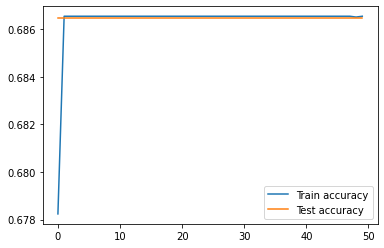

In [50]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

- **Note:** As we can see from both the graphs that NN and RNN models did not give us better accuracy than **Ada Boosting** model. So, we will stick to **Ada Boosting** model.